# Machine Learning With Titanic Data Set
Sklearn has multiple ways to classify data such as decision trees and random forest which I will show how to set up and use here. First task it to import libraries. Then we make it so that our graphs show inline or within the code without using plt.show(). Also we set seaborn as the default graphing library. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
%matplotlib inline
sns.set()

# Importing the Data
Here we create panda data frames to easily munge and fix up the data so that we can use it for machine learning. We bring the test and train data, train being data with known outcomes (1 for survived and 0 for did not survive) and the test data does not contain this outcome but it used to test our predictive algorithm. 

In [5]:
df_train = pd.read_csv('C:\\Users\\justin\\PycharmProjects\\Main_Test\\Machine-Learning\\Titanic Data\\train.csv')
df_test = pd.read_csv('C:\\Users\\justin\\PycharmProjects\\Main_Test\\Machine-Learning\\Titanic Data\\test.csv')

In [6]:
survived_train = df_train.Survived

In [7]:
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

# Filling NA's
Here we can see that age and fare contain a fare amount of NA or NaN's (empty entries). Looking at the data an easy fix is to fill the NA's with the median value of the data. We do not use mean since mean is scewed by outliers more so then median. Then we turn sex into numbers by creating dummies of the data and then only keeping the male column (since male is the first one it makes). This column gives 1 for is male and 0 for is not male. Then we drop columns that will not help us classify our data.

In [8]:
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

In [9]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

In [10]:
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]

# Final Munging
Here we create train and test data changed by our above munging. Then we get the three varibles we need to have the machine learning, learn. We split the data at the 891 mark and that way have data that we will train off of and data that we will test both of which that do not have a survived column. We also create third varible being the data with survived column not removed.

In [11]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

In [12]:
X = data_train.values
test = data_test.values
y = survived_train.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Machine Learning
Here we use sklearn to create a decision tree and a random forest to help us try to predict the outcome of our test data. Then we save our prediciton in a new .csv file.

In [13]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicted,0,1,All
True,,,
0,474,75,549
1,108,234,342
All,582,309,891


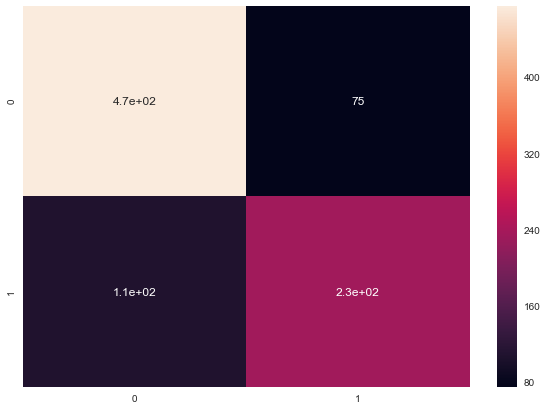

In [14]:
Y_pred = lr.predict(X)
cm = confusion_matrix(survived_train, Y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
pd.crosstab(survived_train, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [15]:
accuracy_score(survived_train, Y_pred)

0.7946127946127947

In [16]:
Y_pred = lr.predict(test)
df_test['Survived'] = Y_pred

In [17]:
df_test[['PassengerId', 'Survived']].to_csv('LogReg.csv', index=False)

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predicted,0,1,All
True,,,
0,493,56,549
1,98,244,342
All,591,300,891


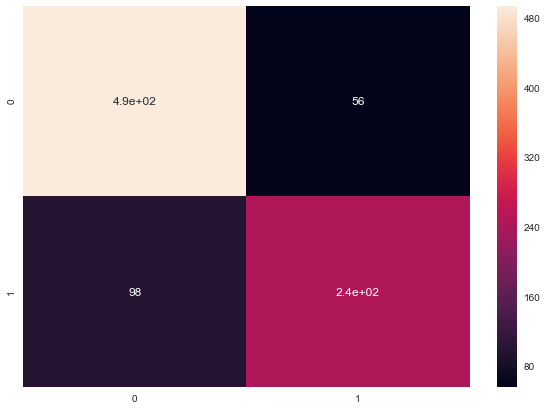

In [19]:
Y_pred = clf.predict(X)
cm = confusion_matrix(survived_train, Y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
pd.crosstab(survived_train, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [20]:
accuracy_score(survived_train, Y_pred)

0.8271604938271605

In [21]:
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred

In [22]:
df_test[['PassengerId', 'Survived']].to_csv('DecisionTreeClassifier.csv', index=False)

In [23]:
clf1 = RandomForestClassifier(max_depth=3, random_state=1)
clf1.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

Predicted,0,1,All
True,,,
0,494,55,549
1,96,246,342
All,590,301,891


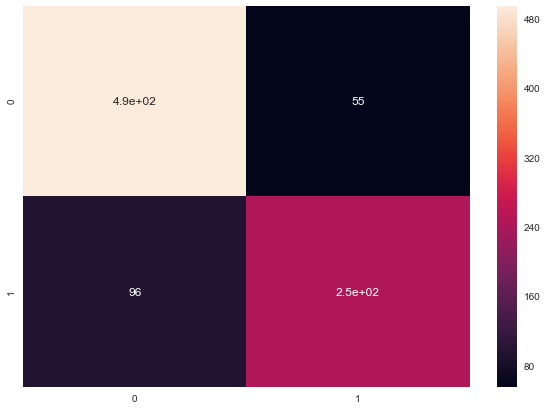

In [25]:
Y_pred = clf1.predict(X)
cm = confusion_matrix(survived_train, Y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
pd.crosstab(survived_train, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [26]:
accuracy_score(survived_train, Y_pred)

0.8305274971941639

In [27]:
Y_pred = clf1.predict(test)
df_test['Survived'] = Y_pred

In [28]:
df_test[['PassengerId', 'Survived']].to_csv('RandomForestClassifier.csv', index=False)